# LOGISTIC REGRESSIONS
Logistic regression is a statistical method for binary classification that predicts the probability of an event occurring by fitting data to a logistic curve. It is commonly used when the dependent variable is binary—like predicting whether a tumor is benign (class B) or malignant (class M) in medical datasets.

**Using Logistic Regression on This Dataset**:
**Prepare the Data**: Identify features and the binary target ('diagnosis').

**Train and Evaluate the Model**: Split the data into training and test sets, train the logistic regression model on the training set, and evaluate its performance using metrics like accuracy and ROC curve.

**Prediction**: Use the model to predict malignancy probabilities for new samples.

Logistic regression is particularly useful due to its simplicity and effectiveness in providing probabilities for classification outcomes, making it a good choice for initial analysis in medical diagnostics.

In [38]:
#Import all the libraries needed in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
#Downloading the data, the training and the test set
data = pd.read_csv("Data.csv")
data_test = pd.read_csv("test_set.csv") 
data_train = pd.read_csv("train_set.csv")

In [40]:
data_train

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,13.08,381.9,0.09754,0.05113,0.01982,0.01786,0.1830,0.06105
1,0,24.99,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341
2,1,15.70,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
3,0,13.04,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270
4,0,18.54,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066
...,...,...,...,...,...,...,...,...,...
494,1,18.47,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525
495,1,14.26,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032
496,0,15.98,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898
497,0,18.45,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934


# Cross-validation
**Cross-validation** is an essential technique in the machine learning workflow, particularly useful for assessing how effectively a predictive model will perform in practice. It's designed to overcome the problem of overfitting, where a model performs exceptionally well on its training data but poorly on unseen data. Here’s a more conversational explanation of how it works, particularly in the context of setting up k-fold cross-validation with specific parameters:

**Understanding Cross-Validation**
K-fold cross-validation is one of the most popular methods of cross-validation. The "k" in k-fold cross-validation refers to the number of groups that a given data sample is to be split into. Commonly, this number ranges from 5 to 10, but it really depends on the size of the dataset and the balance between learning accurately from the training set and verifying this learning on the test set.

Setting Up K-Fold Cross-Validation
When you configure k-fold cross-validation, you're setting up a process where the data set is divided into 'k' equal (or nearly equal) segments or 'folds'. Here’s how you would typically set it up:

**KFold(n_splits=5, shuffle=True, random_state=87)**: This function from scikit-learn’s model selection module is being used to define the parameters of our k-fold cross-validation:

**n_splits=5**: This specifies that the data set should be divided into 5 folds. In other words, the data will be split into five distinct groups.
**shuffle=True**: This parameter is crucial because it randomizes the order of the data before it’s split into the folds. Shuffling is recommended as it removes any inherent biases in the dataset due to the order of the data.

**random_state=87**: This is used for reproducibility of the results. It fixes the randomness of the shuffle to ensure that the results are the same each time the code is run. This is helpful when you need to demonstrate results consistently or compare different models under the same data shuffling.

In [41]:
#Separating the feature from the outcome
X_train = data_train.drop('diagnosis', axis=1)
y_train = data_train['diagnosis']
X_test = data_test.drop('diagnosis', axis=1)
y_test = data_test['diagnosis']


# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Defining the k-fold cross-validation with k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=87)

# Logistic regression

Imagine that you have a bunch of observations consisting of inputs/features $\mathbf{x}_{1:n}=(\mathbf{x}_1,\dots,\mathbf{x}_n)$ and the corresponding targets $y_{1:n}=(y_1,\dots,y_n)$.
Remember that we say that we have a classification problem when the targets are discrete labels.
In particular, if the labels are two, say 0 or 1, we say we have a *binary classification problem*.

The logistic regression model is one of the simplest ways to solve the binary classification problem.
It goes as follows.
You model the probability that $y=1$ conditioned on having $\mathbf{x}$ by:

$$
p(y=1|\mathbf{x},\mathbf{w}) = \operatorname{sigm}\left(\sum_{j=1}^mw_j\phi_j(\mathbf{x})\right) = \operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right),
$$

where $\operatorname{sigm}$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), the $\phi_j(\mathbf{x})$ are $m$ basis functions/features,

$$
\boldsymbol{\phi}(\mathbf{x}) = \left(\phi_1(\mathbf{x}),\dots,\phi_m(\mathbf{x})\right)
$$

and the $w_j$'s are $m$ weights that we need to learn from the data.
The sigmoid function is defined by:

$$
\operatorname{sigm}(z) = \frac{1}{1+e^{-z}},
$$

and all it does is take a real number and map it to $[0,1]$ to represent a probability.
In other words, logistic regression is just a generalized linear model passed through the sigmoid function so that it is mapped to $[0,1]$.

If you need the probability of $y=0$, it is given by the obvious rule:

$$
p(y=0|\mathbf{x},\mathbf{w}) = 1 - p(y=1|\mathbf{x},\mathbf{w}) = 1 - \operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right)
$$

You can represent the probability of an arbitrary label $y$ conditioned on $\mathbf{x}$ using this simple trick:

$$
p(y|\mathbf{x},\mathbf{w}) =
\left[\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right)\right]^y
\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right)\right]^{1-y}.
$$

Notice that when $y=1$, the exponent of the second term becomes zero, and thus, the term becomes one.
Similarly, when $y=0$, the exponent of the first term becomes zero, and thus the term becomes one.
This trick gives the correct probability for each case.
The likelihood of all the observed data is:

$$
p(y_{1:n}|\mathbf{x}_{1:n},\mathbf{w}) = \prod_{i=1}^np(y_i |\mathbf{x}_i, \mathbf{w})
= \prod_{i=1}^n
\left[\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]^{y_i}
\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]^{1-y_i}.
$$

We can now find the best weight vector $\mathbf{w}$ using the [maximum likelihood principle](https://purduemechanicalengineering.github.io/me-297-intro-to-data-science/lecture13/the-maximum-likelihood-principle.html).
We need to solve the optimization problem:

$$
\max_{\mathbf{w}}\log p(y_{1:n}|\mathbf{x}_{1:n},\mathbf{w})
= \max_{\mathbf{w}}\sum_{i=1}^n\left\{y_i\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)+(1-y_i)\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]\right\}.
$$

Notice that the following maximization problem is equivalent to minimizing this loss function:

$$
L(\mathbf{w}) = -\sum_{i=1}^n\left\{y_i\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)+(1-y_i)\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]\right\}.
$$

This function is known as the [cross-entropy loss function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression), and you are very likely to encounter it if you dive deeper into modern data science.
For example, we use the same loss function to train state-of-the-art deep neural networks that classify images.
You now know that it does not come out of the blue.
It comes from the maximum likelihood principle.


In [43]:
# Defining the regression model 
log_model = LogisticRegression()

# Esecuting the k-fold cross-validation with the defined model
scores_cv = cross_val_score(log_model, X_train_scaled, y_train, cv=kf)

#Printing the punteggi
print("k-fold cross-validation scores:", scores_cv)

k-fold cross-validation scores: [0.95       0.97       0.92       0.91       0.95959596]


k-fold cross-validation scores (Accuracy): [0.95       0.97       0.92       0.91       0.95959596]
Mean Accuracy: 0.9419191919191918


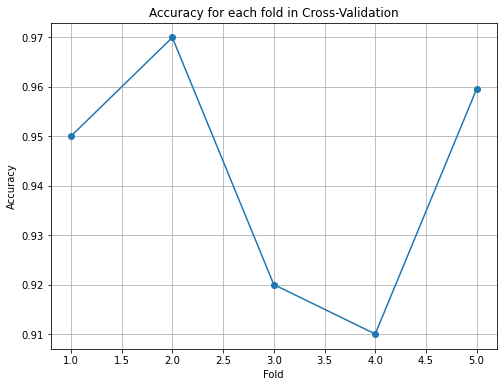

In [44]:
# Esecuzione della k-fold cross-validation con il modello definito
scores_cv = cross_val_score(log_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

# Stampare i punteggi
print("k-fold cross-validation scores (Accuracy):", scores_cv)

# Calcolo della media degli score
mean_accuracy = scores_cv.mean()
print("Mean Accuracy:", mean_accuracy)

# Plot dell'accuratezza per ogni fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores_cv) + 1), scores_cv, marker='o', linestyle='-')
plt.title('Accuracy for each fold in Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

These scores are calculated based on how accurately the model predicted the outcome compared to the actual data. For each fold:
The model is trained on a subset (k-1 folds).
It is then tested on the remaining fold.
The accuracy (or other metric if specified) of the model in predicting the correct outcomes for the test fold is calculated and returned as a score for that fold.

### Log Likelihood Formula for Logistic Regression

The log likelihood is a measure of the probability of observing the data given a specific model. For logistic regression models, the log likelihood \(L\) can be expressed as follows.

For a logistic regression model with a binary dependent variable $y_i$ (where $y_i = 1$ or $y_i = 0$ ) and predictors $x_i$, the log likelihood $L$ is given by:

$$
L(\beta) = \sum_{i=1}^n \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

where:

- $\beta$ are the model parameters, including the intercept. These coefficients modify the influence each predictor $ x_i $ has on the outcome.
-$ p_i $ is the predicted probability that $ y_i = 1$, calculated using the logistic function:

  $$
  p_i = \frac{1}{1 + e^{-\beta^T x_i}}
  $$
  
  Here, $\beta^T x_i$ represents the dot product of the parameter vector $\beta$ and the predictor vector $ x_i $ for the ith observation, which forms the argument for the logistic function.
- $ n $ is the total number of observations in the dataset, which corresponds to the number of summands in the log likelihood function.


In [45]:
# Training the model on the complete dataset
log_model.fit(X_train_scaled, y_train)

# print the summary
modello_sm = sm.Logit(y_train, X_train_scaled)
results_log = modello_sm.fit()
print(results_log.summary())

Optimization terminated successfully.
         Current function value: 0.190285
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  499
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.7254
Time:                        02:17:53   Log-Likelihood:                -94.952
converged:                       True   LL-Null:                       -345.83
Covariance Type:            nonrobust   LLR p-value:                3.357e-104
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3172      0.230      5.723      0.000       0.866       1.768
x2             1.3537      0.

### Summary
The summary table from the logistic regression analysis provides several key pieces of information about the model's performance and the significance of each predictor variable. Here are the most noteworthy points highlighted:

**Model Fit**: The model has a Pseudo **R-squared** of **0.7254**, suggesting a good fit as this value indicates a substantial proportion of variance in the dependent variable is explained by the model.

**Significance of Predictors**: The **P>|z|** column shows the p-values associated with the test of the null hypothesis that each coefficient is zero (no effect). Notable variables include:

**texture_mean** and **concave points_mean** show highly significant coefficients (**p-values < 0.01**), indicating strong evidence against the null hypothesis, thus they are very likely to be important predictors in this model.
**area_mean, smoothness_mean, and fractal_dimension_mean** also display significant **p-values** suggesting moderate evidence against the null hypothesis.

**Coefficient Values**: The coefficients show the change in the log odds of the outcome for a one-unit increase in the predictor variable. For instance, **texture_mean**, with a coefficient of **1.3172**, greatly influences the probability, increasing the odds of the outcome as it increases.

**Model's Predictive Power**: The **Log-Likelihood** value is **-94.952**, which, along with the LLR p-value (3.357e-104), shows that the model as a whole significantly improves the fit over an intercept-only model.

**Estimation Precision**: The std err values indicate the standard error of the estimated coefficients, which measures the accuracy of the coefficient estimates. Lower values suggest more precise estimates.

This summary gives a comprehensive view of which variables are statistically significant and their respective weights in the predictive model, thereby informing decisions on potential factors that are most influential in predicting the outcome.

### Calculating metrics and plotting the confusion matrix for the training set

Metrics for Training Set:
Accuracy: 0.9378757515030061
Specificity: 0.9525691699604744
Sensitivity (Recall): 0.9227642276422764
Kappa Cohen: 0.875678108449131


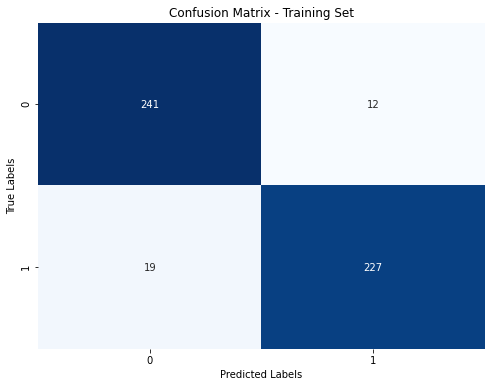

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcolo delle previsioni sul set di addestramento
train_predictions = log_model.predict(X_train_scaled)

# Calcolo dell'accuracy
accuracy = accuracy_score(y_train, train_predictions)

# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(y_train, train_predictions)

# Calcolo della specificità e sensibilità
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Calcolo del Kappa di Cohen
total = tn + fp + fn + tp
p0 = (tn + tp) / total
pe = ((tn + fn) * (tn + fp) + (fp + tp) * (fn + tp)) / (total ** 2)
kappa = (p0 - pe) / (1 - pe)

# Stampa delle metriche
print("Metrics for Training Set:")
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity (Recall):", sensitivity)
print("Kappa Cohen:", kappa)

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The classification metrics shows very high values in both training and test sets

### Calculating metrics and plotting the confusion matrix for the test set


Metrics for Test Set:
Accuracy: 0.9302325581395349
Specificity: 0.8942307692307693
Sensitivity (Recall): 0.963963963963964
Kappa Cohen: 0.8600199661443638


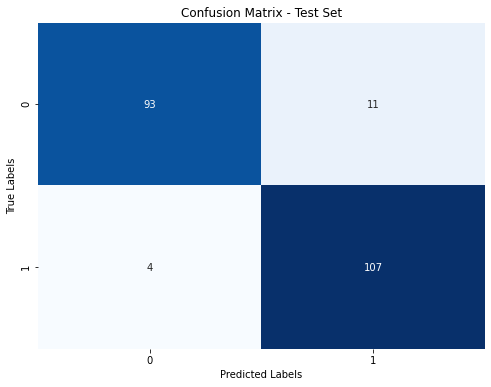

In [47]:
# Calcolo delle previsioni sul set di test
test_predictions = log_model.predict(X_test_scaled)

# Calcolo dell'accuracy
accuracy_test = accuracy_score(y_test, test_predictions)

# Calcolo della matrice di confusione
conf_matrix_test = confusion_matrix(y_test, test_predictions)

# Calcolo della specificità e sensibilità
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)

# Calcolo del Kappa di Cohen
total_test = tn_test + fp_test + fn_test + tp_test
p0_test = (tn_test + tp_test) / total_test
pe_test = ((tn_test + fn_test) * (tn_test + fp_test) + (fp_test + tp_test) * (fn_test + tp_test)) / (total_test ** 2)
kappa_test = (p0_test - pe_test) / (1 - pe_test)

# Stampa delle metriche
print("\nMetrics for Test Set:")
print("Accuracy:", accuracy_test)
print("Specificity:", specificity_test)
print("Sensitivity (Recall):", sensitivity_test)
print("Kappa Cohen:", kappa_test)

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Plotting ROC curves for both training and test sets, calculating accuracy, and finding the optimal threshold from the training set
Even though the model already shows high metrics, i decide to look for the best classification threshold.

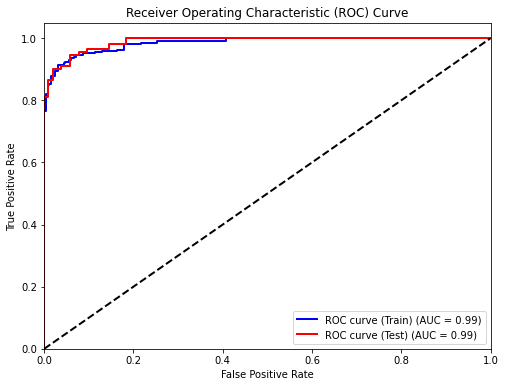

In [48]:
from sklearn.metrics import roc_curve, auc

# Calculating predicted probabilities on the training set
train_predicted_probabilities = log_model.predict_proba(X_train_scaled)[:, 1]

# Calculating predicted probabilities on the test set
test_predicted_probabilities = log_model.predict_proba(X_test_scaled)[:, 1]

# Calculating the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predicted_probabilities)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculating the ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predicted_probabilities)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (Test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculating accuracy for different thresholds on the training set
accuracies_train = []
for threshold in thresholds_train:
    train_predictions_thresh = (train_predicted_probabilities >= threshold).astype(int)
    accuracy_thresh = accuracy_score(y_train, train_predictions_thresh)
    accuracies_train.append(accuracy_thresh)

# Finding the optimal threshold that maximizes accuracy on the training set
optimal_threshold_index = np.argmax(accuracies_train)
optimal_threshold = thresholds_train[optimal_threshold_index]

In [49]:
# Printing the optimal threshold
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.5493455639648136


### Refitting the model with the new threshold on the training set and calculating metrics as before

Metrics with Optimal Threshold on Training Set:
Accuracy: 0.9418837675350702
Specificity: 0.9683794466403162
Sensitivity (Recall): 0.9146341463414634
Kappa Cohen: 0.8836596052578688


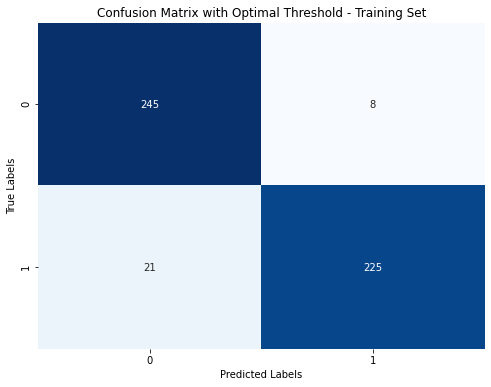

In [50]:
# Refitting the model with the new threshold on the training set
train_predictions_opt_thresh = (train_predicted_probabilities >= optimal_threshold).astype(int)

# Calculating accuracy with the optimal threshold on the training set
accuracy_opt_thresh = accuracy_score(y_train, train_predictions_opt_thresh)

# Calculating the confusion matrix with the optimal threshold on the training set
conf_matrix_opt_thresh = confusion_matrix(y_train, train_predictions_opt_thresh)

# Calculating specificity and sensitivity with the optimal threshold on the training set
tn_opt_thresh, fp_opt_thresh, fn_opt_thresh, tp_opt_thresh = conf_matrix_opt_thresh.ravel()
specificity_opt_thresh = tn_opt_thresh / (tn_opt_thresh + fp_opt_thresh)
sensitivity_opt_thresh = tp_opt_thresh / (tp_opt_thresh + fn_opt_thresh)

# Calculating Cohen's Kappa with the optimal threshold on the training set
total_opt_thresh = tn_opt_thresh + fp_opt_thresh + fn_opt_thresh + tp_opt_thresh
p0_opt_thresh = (tn_opt_thresh + tp_opt_thresh) / total_opt_thresh
pe_opt_thresh = ((tn_opt_thresh + fn_opt_thresh) * (tn_opt_thresh + fp_opt_thresh) + 
                (fp_opt_thresh + tp_opt_thresh) * (fn_opt_thresh + tp_opt_thresh)) / (total_opt_thresh ** 2)
kappa_opt_thresh = (p0_opt_thresh - pe_opt_thresh) / (1 - pe_opt_thresh)

# Printing the metrics with the optimal threshold on the training set
print("Metrics with Optimal Threshold on Training Set:")
print("Accuracy:", accuracy_opt_thresh)
print("Specificity:", specificity_opt_thresh)
print("Sensitivity (Recall):", sensitivity_opt_thresh)
print("Kappa Cohen:", kappa_opt_thresh)

# Plotting the confusion matrix with the optimal threshold on the training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_opt_thresh, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix with Optimal Threshold - Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Refitting the model with the new threshold on the test set and calculating metrics as before


Metrics with Optimal Threshold on Test Set:
Accuracy: 0.9395348837209302
Specificity: 0.9326923076923077
Sensitivity (Recall): 0.9459459459459459
Kappa Cohen: 0.878904726831593


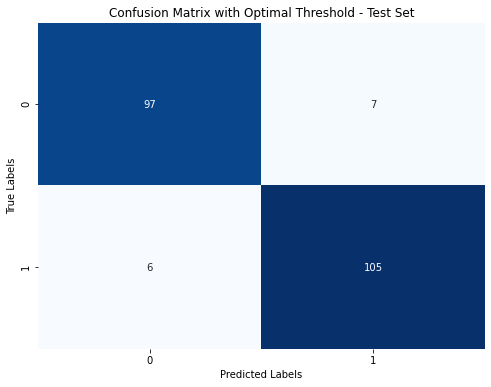

In [51]:
# Refitting the model with the new threshold on the test set
test_predictions_opt_thresh = (test_predicted_probabilities >= optimal_threshold).astype(int)

# Calculating accuracy with the optimal threshold on the test set
accuracy_test_opt_thresh = accuracy_score(y_test, test_predictions_opt_thresh)

# Calculating the confusion matrix with the optimal threshold on the test set
conf_matrix_test_opt_thresh = confusion_matrix(y_test, test_predictions_opt_thresh)

# Calculating specificity and sensitivity with the optimal threshold on the test set
tn_test_opt_thresh, fp_test_opt_thresh, fn_test_opt_thresh, tp_test_opt_thresh = conf_matrix_test_opt_thresh.ravel()
specificity_test_opt_thresh = tn_test_opt_thresh / (tn_test_opt_thresh + fp_test_opt_thresh)
sensitivity_test_opt_thresh = tp_test_opt_thresh / (tp_test_opt_thresh + fn_test_opt_thresh)

# Calculating Cohen's Kappa with the optimal threshold on the test set
total_test_opt_thresh = tn_test_opt_thresh + fp_test_opt_thresh + fn_test_opt_thresh + tp_test_opt_thresh
p0_test_opt_thresh = (tn_test_opt_thresh + tp_test_opt_thresh) / total_test_opt_thresh
pe_test_opt_thresh = ((tn_test_opt_thresh + fn_test_opt_thresh) * (tn_test_opt_thresh + fp_test_opt_thresh) + 
                     (fp_test_opt_thresh + tp_test_opt_thresh) * (fn_test_opt_thresh + tp_test_opt_thresh)) / (total_test_opt_thresh ** 2)
kappa_test_opt_thresh = (p0_test_opt_thresh - pe_test_opt_thresh) / (1 - pe_test_opt_thresh)

# Printing the metrics with the optimal threshold on the test set
print("\nMetrics with Optimal Threshold on Test Set:")
print("Accuracy:", accuracy_test_opt_thresh)
print("Specificity:", specificity_test_opt_thresh)
print("Sensitivity (Recall):", sensitivity_test_opt_thresh)
print("Kappa Cohen:", kappa_test_opt_thresh)

# Plotting the confusion matrix with the optimal threshold on the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_opt_thresh, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix with Optimal Threshold - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The metrics are getting better after the tuning of the best threshoold

### Replotting the ROC curves with the optimal threshold

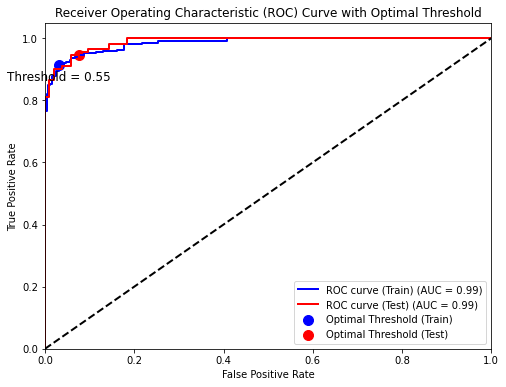

In [52]:
# Find the index of the closest threshold to the optimal threshold in the test set
optimal_threshold_index_test = np.argmin(np.abs(thresholds_test - optimal_threshold))

# Plotting the ROC curves with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (Test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.scatter(fpr_train[optimal_threshold_index], tpr_train[optimal_threshold_index], color='blue', marker='o', label='Optimal Threshold (Train)', s=100)
plt.scatter(fpr_test[optimal_threshold_index_test], tpr_test[optimal_threshold_index_test], color='red', marker='o', label='Optimal Threshold (Test)', s=100)
plt.text(fpr_train[optimal_threshold_index], tpr_train[optimal_threshold_index] - 0.05, f'Threshold = {optimal_threshold:.2f}', fontsize=12, ha='center')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

## Metrics and Loss Function 

In this section three graph will be plotted in order to usterstan the evolution of the loss funcion while the number of observations increase.

### Cross-Entropy
The cross-entropy is a measure of the discrepancy between two probability distributions. In the context of classification, it is used to assess how well a classification model predicts the probabilities of output classes compared to the actual probabilities of observations.

The formula to calculate the cross-entropy between two probability distributions $P$ and $Q$ is:

$$
H(P, Q) = -\sum_{i} P(i) \log(Q(i))
$$

where 
$P(i)$ is the actual probability of event $i$ and $Q(i)$ is the predicted probability of event $i$. This formula computes the sum of the product of actual probabilities and the logarithms of predicted probabilities, taking the negative of the result to obtain the cross-entropy.

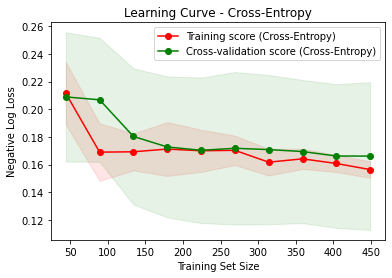

In [53]:
# Configuration of logistic regression model with data standardization and more iterations
log_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='lbfgs'))

# Generating learning curves with cross-entropy as metric
train_sizes, train_scores_entropy, test_scores_entropy = learning_curve(
    log_model, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_log_loss')  # Using 'neg_log_loss' as metric for cross-entropy

# Convert negative scores to positive
train_scores_entropy = -train_scores_entropy
test_scores_entropy = -test_scores_entropy

# Calculating means and standard deviations of training and test set scores for cross-entropy
train_mean_entropy = np.mean(train_scores_entropy, axis=1)
train_std_entropy = np.std(train_scores_entropy, axis=1)
test_mean_entropy = np.mean(test_scores_entropy, axis=1)
test_std_entropy = np.std(test_scores_entropy, axis=1)

# Plotting learning curves for cross-entropy
plt.fill_between(train_sizes, train_mean_entropy - train_std_entropy,
                 train_mean_entropy + train_std_entropy, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean_entropy - test_std_entropy,
                 test_mean_entropy + test_std_entropy, color='g', alpha=0.1)

plt.plot(train_sizes, train_mean_entropy, 'o-', color="r",
         label="Training score (Cross-Entropy)")
plt.plot(train_sizes, test_mean_entropy, 'o-', color="g",
         label="Cross-validation score (Cross-Entropy)")

plt.title("Learning Curve - Cross-Entropy")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Log Loss")
plt.legend(loc="best")
plt.show()

### Accuracy

The formula to calculate accuracy is:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$
 
This formula computes the ratio of correct predictions to the total number of predictions, providing a percentage value representing the model's overall correctness.

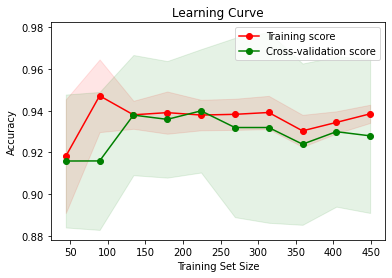

In [33]:
# Configuration of logistic regression model with data standardization
log_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='lbfgs'))

# Generating learning curves
train_sizes, train_scores, test_scores = learning_curve(
    log_model, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy')

# Calculating means and standard deviations of training and test set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting learning curves
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color='g', alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

### Log Likelihood Function

The log likelihood is a measure of the probability of observing the data given a specific model. For logistic regression models, the log likelihood \(L\) can be expressed as follows.
For a logistic regression model with a binary dependent variable $y_i$ (where $y_i = 1$ or $y_i = 0$ ) and predictors $x_i$, the log likelihood $L$ is given by:

$$
L(\beta) = \sum_{i=1}^n \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

where:

- $\beta$ are the model parameters, including the intercept. These coefficients modify the influence each predictor $ x_i $ has on the outcome.
-$ p_i $ is the predicted probability that $ y_i = 1$, calculated using the logistic function:

  $$
  p_i = \frac{1}{1 + e^{-\beta^T x_i}}
  $$
  
  Here, $\beta^T x_i$ represents the dot product of the parameter vector $\beta$ and the predictor vector $ x_i $ for the ith observation, which forms the argument for the logistic function.
- $ n $ is the total number of observations in the dataset, which corresponds to the number of summands in the log likelihood function.

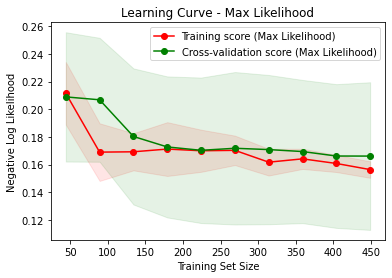

In [54]:
# Configuration of logistic regression model with data standardization and more iterations
log_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='lbfgs'))

# Generating learning curves with maximum likelihood as metric
train_sizes, train_scores_likelihood, test_scores_likelihood = learning_curve(
    log_model, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_log_loss')  # Using 'neg_log_loss' as metric for maximum likelihood

# Convert negative scores to positive
train_scores_likelihood = -train_scores_likelihood
test_scores_likelihood = -test_scores_likelihood

# Calculating means and standard deviations of training and test set scores for maximum likelihood
train_mean_likelihood = np.mean(train_scores_likelihood, axis=1)
train_std_likelihood = np.std(train_scores_likelihood, axis=1)
test_mean_likelihood = np.mean(test_scores_likelihood, axis=1)
test_std_likelihood = np.std(test_scores_likelihood, axis=1)

# Plotting learning curves for maximum likelihood
plt.fill_between(train_sizes, train_mean_likelihood - train_std_likelihood,
                 train_mean_likelihood + train_std_likelihood, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean_likelihood - test_std_likelihood,
                 test_mean_likelihood + test_std_likelihood, color='g', alpha=0.1)

plt.plot(train_sizes, train_mean_likelihood, 'o-', color="r",
         label="Training score (Max Likelihood)")
plt.plot(train_sizes, test_mean_likelihood, 'o-', color="g",
         label="Cross-validation score (Max Likelihood)")

plt.title("Learning Curve - Max Likelihood")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Log Likelihood")
plt.legend(loc="best")
plt.show()

# LASSO REGRESSION

Lasso regression, short for "**Least Absolute Shrinkage and Selection Operator**", is a type of linear regression that adds a penalty term to the standard regression objective function. This penalty term is a sum of the absolute values of the coefficients multiplied by a constant factor, typically denoted as alpha.

The main goal of lasso regression is to perform both variable selection and regularization to improve the prediction accuracy and **interpretability** of the model. It achieves this by encouraging the coefficients of less important features to be exactly zero, effectively removing them from the model. This makes lasso regression particularly useful when dealing with high-dimensional datasets with many features, as it can automatically select the most relevant features while ignoring the rest.

In summary, lasso regression helps prevent overfitting by **penalizing** the absolute size of the coefficients, leading to a simpler and more interpretable model with potentially better predictive performance.

$$
\underset{\beta}{\text{minimize}} \left( \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right)
$$

This expression represents the objective function of Lasso regression, where:

**$yi$** represents the observed value of the dependent variable for the $i-th$ observation, 

$β0$ is the intercept term, 

$xij$ represents the value of the $j-th$ predictor variable for the $i-th$ observation,

$βj$ is the coefficient of the $j-th$ predictor variable,

$n$ is the number of observations,

$p$ is the number of predictor variables,

$λ$ is the regularization parameter.

This objective function aims to minimize the residual sum of squares (first term) while adding a penalty term (second term) to the sum of absolute values of the coefficients ($βj$). The regularization parameter $λ$ controls the strength of the penalty term, influencing the amount of shrinkage applied to the coefficients during the optimization process.

## Fitting the Lasso Regression model

In [55]:
#Fitting the Lasso Regression model
lasso_model = Lasso()

# Fitting the Lasso model on the training set
lasso_model.fit(X_train_scaled, y_train)

Lasso()

##  Tuning the Alpha hyperparameter

In [56]:
# Tuning the alpha hyperparameter

# Defining a range of alpha values to search over
alpha_range = np.logspace(-4, 0, 100)

# Grid search with cross-validation to find the best alpha
lasso_grid = GridSearchCV(estimator=Lasso(), param_grid={'alpha': alpha_range}, cv=kf, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Selecting the best alpha value
best_alpha = lasso_grid.best_params_['alpha']
print("Best Alpha:", best_alpha)

Best Alpha: 0.0054622772176843425


## Step 3: Plotting the change in accuracy with different alpha values

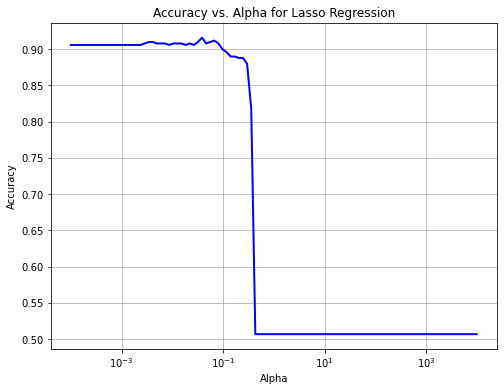

In [57]:
# Plotting the accuracy of the Lasso model at different alpha values

# Define a range of alpha values for tuning
alphas = np.logspace(-4, 4, 100)

# Initialize lists to store accuracies for different alpha values
accuracies_lasso = []

# Iterate over each alpha value
for alpha in alphas:
    # Fit the Lasso model with the current alpha value
    lasso_model_alpha = Lasso(alpha=alpha)
    lasso_model_alpha.fit(X_train_scaled, y_train)
    
    # Calculate accuracy
    lasso_train_predictions_alpha = lasso_model_alpha.predict(X_train_scaled)
    lasso_train_predictions_rounded_alpha = np.round(lasso_train_predictions_alpha).astype(int)
    accuracy_alpha = accuracy_score(y_train, lasso_train_predictions_rounded_alpha)
    
    # Append accuracy to the list
    accuracies_lasso.append(accuracy_alpha)

# Plotting the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(alphas, accuracies_lasso, color='blue', lw=2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Lasso Regression')
plt.grid(True)
plt.show()

In [20]:
best_alpha

0.0054622772176843425

In [58]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit  Lasso with statsmodels
lasso_logit = sm.Logit(y_train, X_train_scaled)
lasso_result = lasso_logit.fit_regularized(alpha=best_alpha, L1_wt=1)

# print the summary
print(lasso_result.summary())

# Coefficients
lasso_coefficients_statsmodels = lasso_result.params

# Visualize the coefficients
print("Coefficients from Lasso Logistic Regression with selected alpha (statsmodels):")
for feature, coef in zip(X_train.columns, lasso_coefficients_statsmodels):
    print(f"Feature: {feature}, Coefficient: {coef}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19037615159677113
            Iterations: 136
            Function evaluations: 136
            Gradient evaluations: 136
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  499
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.5915
Time:                        02:18:23   Log-Likelihood:                -141.26
converged:                       True   LL-Null:                       -345.83
Covariance Type:            nonrobust   LLR p-value:                 3.187e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

 We can see that some coefficient were shrinked toward zero

##  Calculating metrics and plotting confusion matrix on the training set with Lasso Logistic Regression


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19037615159677113
            Iterations: 136
            Function evaluations: 136
            Gradient evaluations: 136
Metrics on Training Set with Lasso Logistic Regression:
Accuracy: 0.8657314629258517
Specificity: 0.9011857707509882
Sensitivity (Recall): 0.8292682926829268
Kappa Cohen: 0.7311530512958658


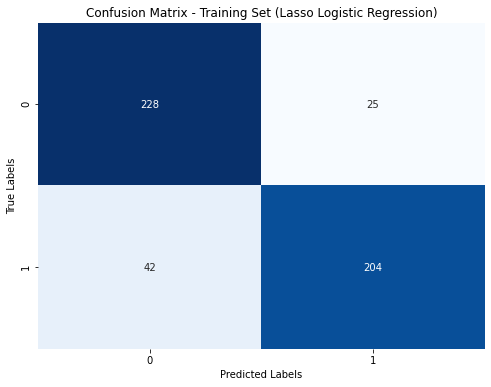

In [59]:
# Calculating metrics and plotting confusion matrix on the training set with Lasso Logistic Regression

# Fit del modello di regressione logistica Lasso con statsmodels
lasso_logit = sm.Logit(y_train, X_train_scaled)
lasso_result = lasso_logit.fit_regularized(alpha=best_alpha, L1_wt=1)

# Making predictions on the training set with Lasso Logistic Regression
lasso_train_predictions = lasso_result.predict(X_train_scaled)

# Converting predicted probabilities to binary predictions
lasso_train_predictions_binary = np.where(lasso_train_predictions > 0.5, 1, 0)

# Calculating accuracy on the training set
lasso_accuracy_train = accuracy_score(y_train, lasso_train_predictions_binary)

# Calculating confusion matrix on the training set
lasso_conf_matrix_train = confusion_matrix(y_train, lasso_train_predictions_binary)

# Calculating specificity and sensitivity on the training set
tn_train, fp_train, fn_train, tp_train = lasso_conf_matrix_train.ravel()
lasso_specificity_train = tn_train / (tn_train + fp_train)
lasso_sensitivity_train = tp_train / (tp_train + fn_train)

# Calculating Cohen's Kappa on the training set
total_train = tn_train + fp_train + fn_train + tp_train
p0_train = (tn_train + tp_train) / total_train
pe_train = ((tn_train + fn_train) * (tn_train + fp_train) + (fp_train + tp_train) * (fn_train + tp_train)) / (total_train ** 2)
lasso_kappa_train = (p0_train - pe_train) / (1 - pe_train)

# Printing metrics on the training set with Lasso Logistic Regression
print("Metrics on Training Set with Lasso Logistic Regression:")
print("Accuracy:", lasso_accuracy_train)
print("Specificity:", lasso_specificity_train)
print("Sensitivity (Recall):", lasso_sensitivity_train)
print("Kappa Cohen:", lasso_kappa_train)

# Plotting confusion matrix on the training set with Lasso Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lasso_conf_matrix_train, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Training Set (Lasso Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Making predictions and calculating metrics on the test set with Lasso Logistic Regression


Metrics on Test Set with Lasso Logistic Regression:
Accuracy: 0.9023255813953488
Specificity: 0.9423076923076923
Sensitivity (Recall): 0.8648648648648649
Kappa Cohen: 0.8049760269534791


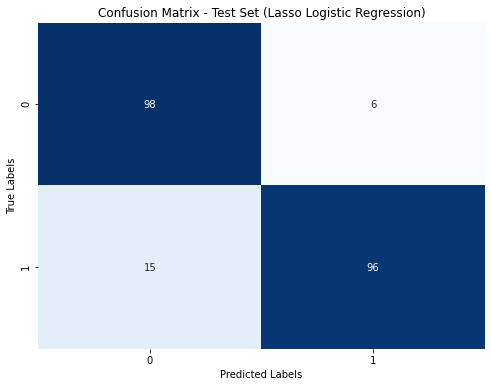

In [60]:
# Making predictions and calculating metrics on the test set with Lasso Logistic Regression

# Making predictions on the test set with Lasso Logistic Regression
lasso_test_predictions = lasso_result.predict(X_test_scaled)

# Converting predicted probabilities to binary predictions
lasso_test_predictions_binary = np.where(lasso_test_predictions > 0.5, 1, 0)

# Calculating accuracy on the test set
lasso_accuracy_test = accuracy_score(y_test, lasso_test_predictions_binary)

# Calculating confusion matrix on the test set
lasso_conf_matrix_test = confusion_matrix(y_test, lasso_test_predictions_binary)

# Calculating specificity and sensitivity on the test set
tn_test, fp_test, fn_test, tp_test = lasso_conf_matrix_test.ravel()
lasso_specificity_test = tn_test / (tn_test + fp_test)
lasso_sensitivity_test = tp_test / (tp_test + fn_test)

# Calculating Cohen's Kappa on the test set
total_test = tn_test + fp_test + fn_test + tp_test
p0_test = (tn_test + tp_test) / total_test
pe_test = ((tn_test + fn_test) * (tn_test + fp_test) + (fp_test + tp_test) * (fn_test + tp_test)) / (total_test ** 2)
lasso_kappa_test = (p0_test - pe_test) / (1 - pe_test)

# Printing metrics on the test set with Lasso Logistic Regression
print("\nMetrics on Test Set with Lasso Logistic Regression:")
print("Accuracy:", lasso_accuracy_test)
print("Specificity:", lasso_specificity_test)
print("Sensitivity (Recall):", lasso_sensitivity_test)
print("Kappa Cohen:", lasso_kappa_test)

# Plotting confusion matrix on the test set with Lasso Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lasso_conf_matrix_test, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Test Set (Lasso Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

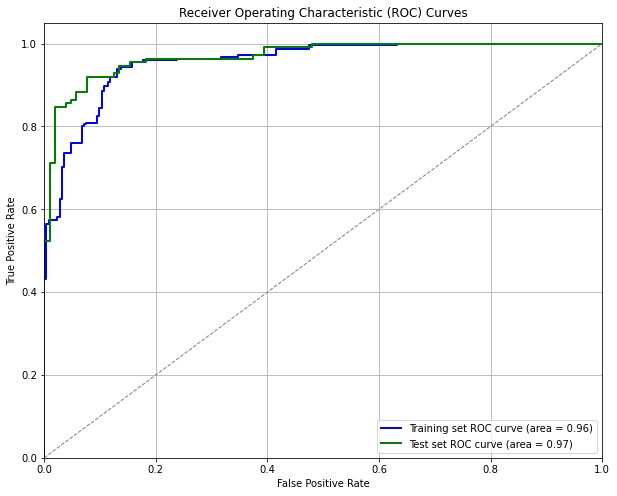

In [24]:
# Calculating metrics and plotting ROC curve on the training set with Lasso Logistic Regression

# Making predictions on the training set with Lasso Logistic Regression
lasso_train_predictions_prob = lasso_result.predict(X_train_scaled)

# Calculating ROC curve and ROC AUC on the training set
fpr_train, tpr_train, _ = roc_curve(y_train, lasso_train_predictions_prob)
roc_auc_train = roc_auc_score(y_train, lasso_train_predictions_prob)

# Step 6: Making predictions and calculating metrics on the test set with Lasso Logistic Regression

# Making predictions on the test set with Lasso Logistic Regression
lasso_test_predictions_prob = lasso_result.predict(X_test_scaled)

# Calculating ROC curve and ROC AUC on the test set
fpr_test, tpr_test, _ = roc_curve(y_test, lasso_test_predictions_prob)
roc_auc_test = roc_auc_score(y_test, lasso_test_predictions_prob)

# Plotting ROC curves for both training and test sets
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training set ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test set ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Finding the optimal threshold from the ROC curve of the training set

In [26]:
# Calculate predicted probabilities for the training set
lasso_train_predictions_prob = lasso_result.predict(X_train_scaled)

# Calculate the ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, lasso_train_predictions_prob)

# Calculate Youden's J statistic to find the optimal threshold
youden_index = np.argmax(tpr_train - fpr_train)
optimal_threshold = thresholds_train[youden_index]

# Print the optimal threshold
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.35106608316161947


### Refitting the model on the training set and calculating metrics with the new threshold

Metrics on Training Set with Lasso Logistic Regression (Optimal Threshold):
Accuracy: 0.8997995991983968
Specificity: 0.8695652173913043
Sensitivity (Recall): 0.9308943089430894
Kappa Cohen: 0.7997399428516391


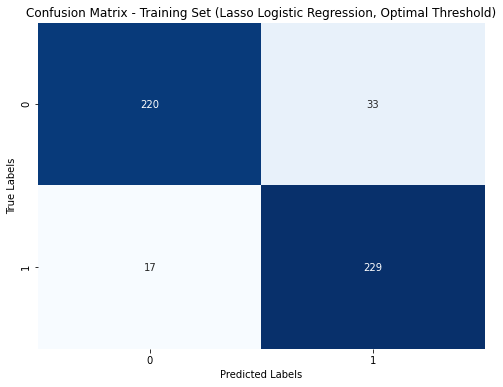

In [27]:
# Convert predicted probabilities to binary predictions using the optimal threshold
lasso_train_predictions_binary_optimal = np.where(lasso_train_predictions_prob > optimal_threshold, 1, 0)

# Calculate accuracy on the training set
lasso_accuracy_train_optimal = accuracy_score(y_train, lasso_train_predictions_binary_optimal)

# Calculate confusion matrix on the training set
lasso_conf_matrix_train_optimal = confusion_matrix(y_train, lasso_train_predictions_binary_optimal)

# Calculate specificity and sensitivity on the training set
tn_train_optimal, fp_train_optimal, fn_train_optimal, tp_train_optimal = lasso_conf_matrix_train_optimal.ravel()
lasso_specificity_train_optimal = tn_train_optimal / (tn_train_optimal + fp_train_optimal)
lasso_sensitivity_train_optimal = tp_train_optimal / (tp_train_optimal + fn_train_optimal)

# Calculate Cohen's Kappa on the training set
total_train_optimal = tn_train_optimal + fp_train_optimal + fn_train_optimal + tp_train_optimal
p0_train_optimal = (tn_train_optimal + tp_train_optimal) / total_train_optimal
pe_train_optimal = ((tn_train_optimal + fn_train_optimal) * (tn_train_optimal + fp_train_optimal) + (fp_train_optimal + tp_train_optimal) * (fn_train_optimal + tp_train_optimal)) / (total_train_optimal ** 2)
lasso_kappa_train_optimal = (p0_train_optimal - pe_train_optimal) / (1 - pe_train_optimal)

# Print metrics on the training set with the optimal threshold
print("Metrics on Training Set with Lasso Logistic Regression (Optimal Threshold):")
print("Accuracy:", lasso_accuracy_train_optimal)
print("Specificity:", lasso_specificity_train_optimal)
print("Sensitivity (Recall):", lasso_sensitivity_train_optimal)
print("Kappa Cohen:", lasso_kappa_train_optimal)

# Plotting confusion matrix on the training set with the optimal threshold
plt.figure(figsize=(8, 6))
sns.heatmap(lasso_conf_matrix_train_optimal, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Training Set (Lasso Logistic Regression, Optimal Threshold)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###  Refitting the model on the test set and calculating metrics with the new threshold, and recalculating ROC curves for both sets


Metrics on Test Set with Lasso Logistic Regression (Optimal Threshold):
Accuracy: 0.9023255813953488
Specificity: 0.8846153846153846
Sensitivity (Recall): 0.918918918918919
Kappa Cohen: 0.8042658343087526


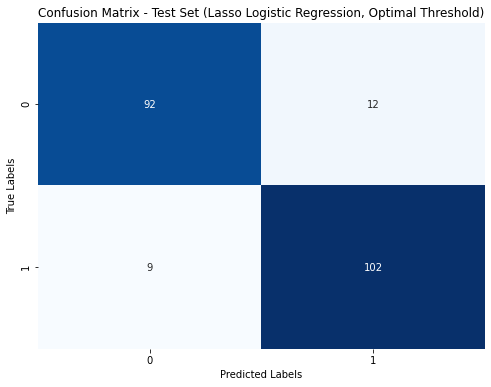

In [30]:
# Calculate predicted probabilities for the test set
lasso_test_predictions_prob = lasso_result.predict(X_test_scaled)

# Convert predicted probabilities to binary predictions using the optimal threshold
lasso_test_predictions_binary_optimal = np.where(lasso_test_predictions_prob > optimal_threshold, 1, 0)

# Calculate accuracy on the test set
lasso_accuracy_test_optimal = accuracy_score(y_test, lasso_test_predictions_binary_optimal)

# Calculate confusion matrix on the test set
lasso_conf_matrix_test_optimal = confusion_matrix(y_test, lasso_test_predictions_binary_optimal)

# Calculate specificity and sensitivity on the test set
tn_test_optimal, fp_test_optimal, fn_test_optimal, tp_test_optimal = lasso_conf_matrix_test_optimal.ravel()
lasso_specificity_test_optimal = tn_test_optimal / (tn_test_optimal + fp_test_optimal)
lasso_sensitivity_test_optimal = tp_test_optimal / (tp_test_optimal + fn_test_optimal)

# Calculate Cohen's Kappa on the test set
total_test_optimal = tn_test_optimal + fp_test_optimal + fn_test_optimal + tp_test_optimal
p0_test_optimal = (tn_test_optimal + tp_test_optimal) / total_test_optimal
pe_test_optimal = ((tn_test_optimal + fn_test_optimal) * (tn_test_optimal + fp_test_optimal) + (fp_test_optimal + tp_test_optimal) * (fn_test_optimal + tp_test_optimal)) / (total_test_optimal ** 2)
lasso_kappa_test_optimal = (p0_test_optimal - pe_test_optimal) / (1 - pe_test_optimal)

# Print metrics on the test set with the optimal threshold
print("\nMetrics on Test Set with Lasso Logistic Regression (Optimal Threshold):")
print("Accuracy:", lasso_accuracy_test_optimal)
print("Specificity:", lasso_specificity_test_optimal)
print("Sensitivity (Recall):", lasso_sensitivity_test_optimal)
print("Kappa Cohen:", lasso_kappa_test_optimal)

# Plotting confusion matrix on the test set with the optimal threshold
plt.figure(figsize=(8, 6))
sns.heatmap(lasso_conf_matrix_test_optimal, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Test Set (Lasso Logistic Regression, Optimal Threshold)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

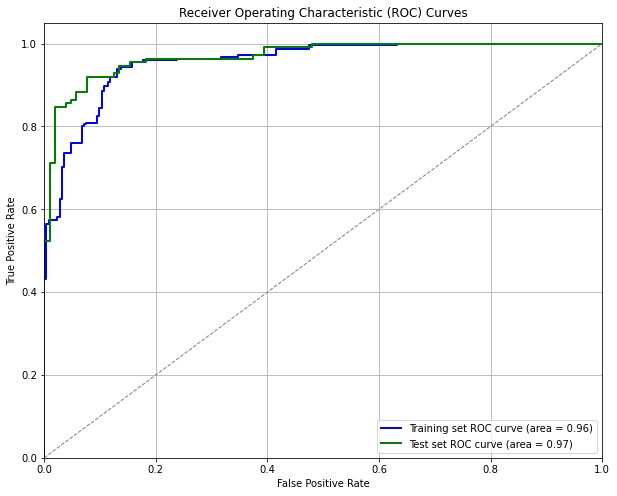

In [29]:
# Recalculate ROC curves with the new threshold for both sets

# Training set ROC curve and AUC
fpr_train, tpr_train, _ = roc_curve(y_train, lasso_train_predictions_prob)
roc_auc_train = roc_auc_score(y_train, lasso_train_predictions_prob)

# Test set ROC curve and AUC
fpr_test, tpr_test, _ = roc_curve(y_test, lasso_test_predictions_prob)
roc_auc_test = roc_auc_score(y_test, lasso_test_predictions_prob)

# Plotting ROC curves for both training and test sets
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training set ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test set ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# PCA LOGISTIC REGRESSION

In [62]:
# PCA on the training set
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)

# Fit the logistic regression model on the transformed training data
log_model_pca = LogisticRegression()
log_model_pca.fit(X_train_pca, y_train)

# Print the summary of the logistic regression model
model_summary = sm.Logit(y_train, X_train_pca).fit()
print(model_summary.summary())


Optimization terminated successfully.
         Current function value: 0.202824
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.7073
Time:                        02:19:50   Log-Likelihood:                -101.21
converged:                       True   LL-Null:                       -345.83
Covariance Type:            nonrobust   LLR p-value:                5.781e-107
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0832      0.200     10.399      0.000       1.691       2.476
x2            -2.0622      0.

We can see that the first two variables are statistically relevant, the third one is not

In [37]:
# Predictions on the training set
train_predictions_pca = log_model_pca.predict(X_train_pca)

# Accuracy on the training set
accuracy_train_pca = accuracy_score(y_train, train_predictions_pca)

# Confusion matrix on the training set
conf_matrix_train_pca = confusion_matrix(y_train, train_predictions_pca)

# Print metrics
print("Metrics for Training Set:")
print("Accuracy:", accuracy_train_pca)
print("Confusion Matrix:")
print(conf_matrix_train_pca)

Metrics for Training Set:
Accuracy: 0.9258517034068137
Confusion Matrix:
[[238  15]
 [ 22 224]]


In [38]:
# PCA on the test set
X_test_pca = pca.transform(X_test_scaled)

# Predictions on the test set
test_predictions_pca = log_model_pca.predict(X_test_pca)

# Accuracy on the test set
accuracy_test_pca = accuracy_score(y_test, test_predictions_pca)

# Confusion matrix on the test set
conf_matrix_test_pca = confusion_matrix(y_test, test_predictions_pca)

# Print metrics
print("\nMetrics for Test Set:")
print("Accuracy:", accuracy_test_pca)
print("Confusion Matrix:")
print(conf_matrix_test_pca)



Metrics for Test Set:
Accuracy: 0.9162790697674419
Confusion Matrix:
[[ 93  11]
 [  7 104]]


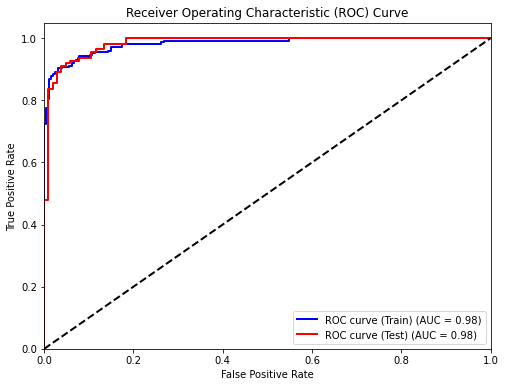

In [39]:
# Predict probabilities for ROC curve
train_predicted_probabilities_pca = log_model_pca.predict_proba(X_train_pca)[:, 1]
test_predicted_probabilities_pca = log_model_pca.predict_proba(X_test_pca)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train_pca, tpr_train_pca, _ = roc_curve(y_train, train_predicted_probabilities_pca)
roc_auc_train_pca = auc(fpr_train_pca, tpr_train_pca)

# Calculate ROC curve and AUC for test set
fpr_test_pca, tpr_test_pca, _ = roc_curve(y_test, test_predicted_probabilities_pca)
roc_auc_test_pca = auc(fpr_test_pca, tpr_test_pca)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_pca, tpr_train_pca, color='blue', lw=2, label='ROC curve (Train) (AUC = %0.2f)' % roc_auc_train_pca)
plt.plot(fpr_test_pca, tpr_test_pca, color='red', lw=2, label='ROC curve (Test) (AUC = %0.2f)' % roc_auc_test_pca)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

We can see, after training numerous logistic regression models, that they have a high ability to make predictions on this data, as could already be anticipated from the plots proposed during the EDA.